<a href="https://www.quantrocket.com"><img alt="QuantRocket logo" src="https://www.quantrocket.com/assets/img/notebook-header-logo.png"></a><br>
<a href="https://www.quantrocket.com/disclaimer/">Disclaimer</a>

***
[Brain Sentiment Data](Introduction.ipynb) › Part 4: Brain Language Metrics on Earnings Call Transcripts
***

# Brain Language Metrics on Earnings Call Transcripts

In this notebook, we examine the Brain Language Metrics on Earnings Call Transcripts dataset (BLMECT).

Start by setting the bundle for this notebook:

In [1]:
from zipline.research import use_bundle
use_bundle("usstock-1d-bundle")

We create a Pipeline that contains the `MD_SENTIMENT` field, which measures the sentiment of Management Discussion section of the earnings call transcript.

In [2]:
from zipline.pipeline import Pipeline, brain, master
from zipline.pipeline.factors import AverageDollarVolume

# limit analysis to stocks
universe = master.SecuritiesMaster.SecType.latest.eq("STK")

avg_dollar_volume = AverageDollarVolume(window_length=90)

md_sentiment =  brain.BLMECT.MD_SENTIMENT.latest

pipeline = Pipeline(
    columns={
        "md_sentiment": md_sentiment,
    },
    initial_universe=universe,
    screen=(
        avg_dollar_volume.top(1000) 
        & md_sentiment.notnull()
    )
)

Next, we run the Pipeline and generate the tear sheet. Stocks with highly positive sentiment (quantile 5) outperform stocks with highly negative sentiment (quantile 1).

,min,max,mean,std,count,avg daily count,count %
Md Sentiment Quantile,,,,,,,
1,-1.000,0.647,0.217,0.302,"472,631",153.5,20.2%
2,0.250,0.793,0.580,0.092,"468,211",152.0,20.0%
3,0.433,0.871,0.722,0.070,"468,607",152.1,20.0%
4,0.586,0.935,0.833,0.053,"467,643",151.8,20.0%
5,0.750,1.000,0.949,0.047,"466,845",151.6,19.9%


,1D,21D
Ann. alpha,0.018,0.018
beta,-0.030,-0.039
Mean Relative Return Top Quantile (bps),0.544,0.467
Mean Relative Return Bottom Quantile (bps),-0.744,-0.662
Mean Spread (bps),1.287,1.123


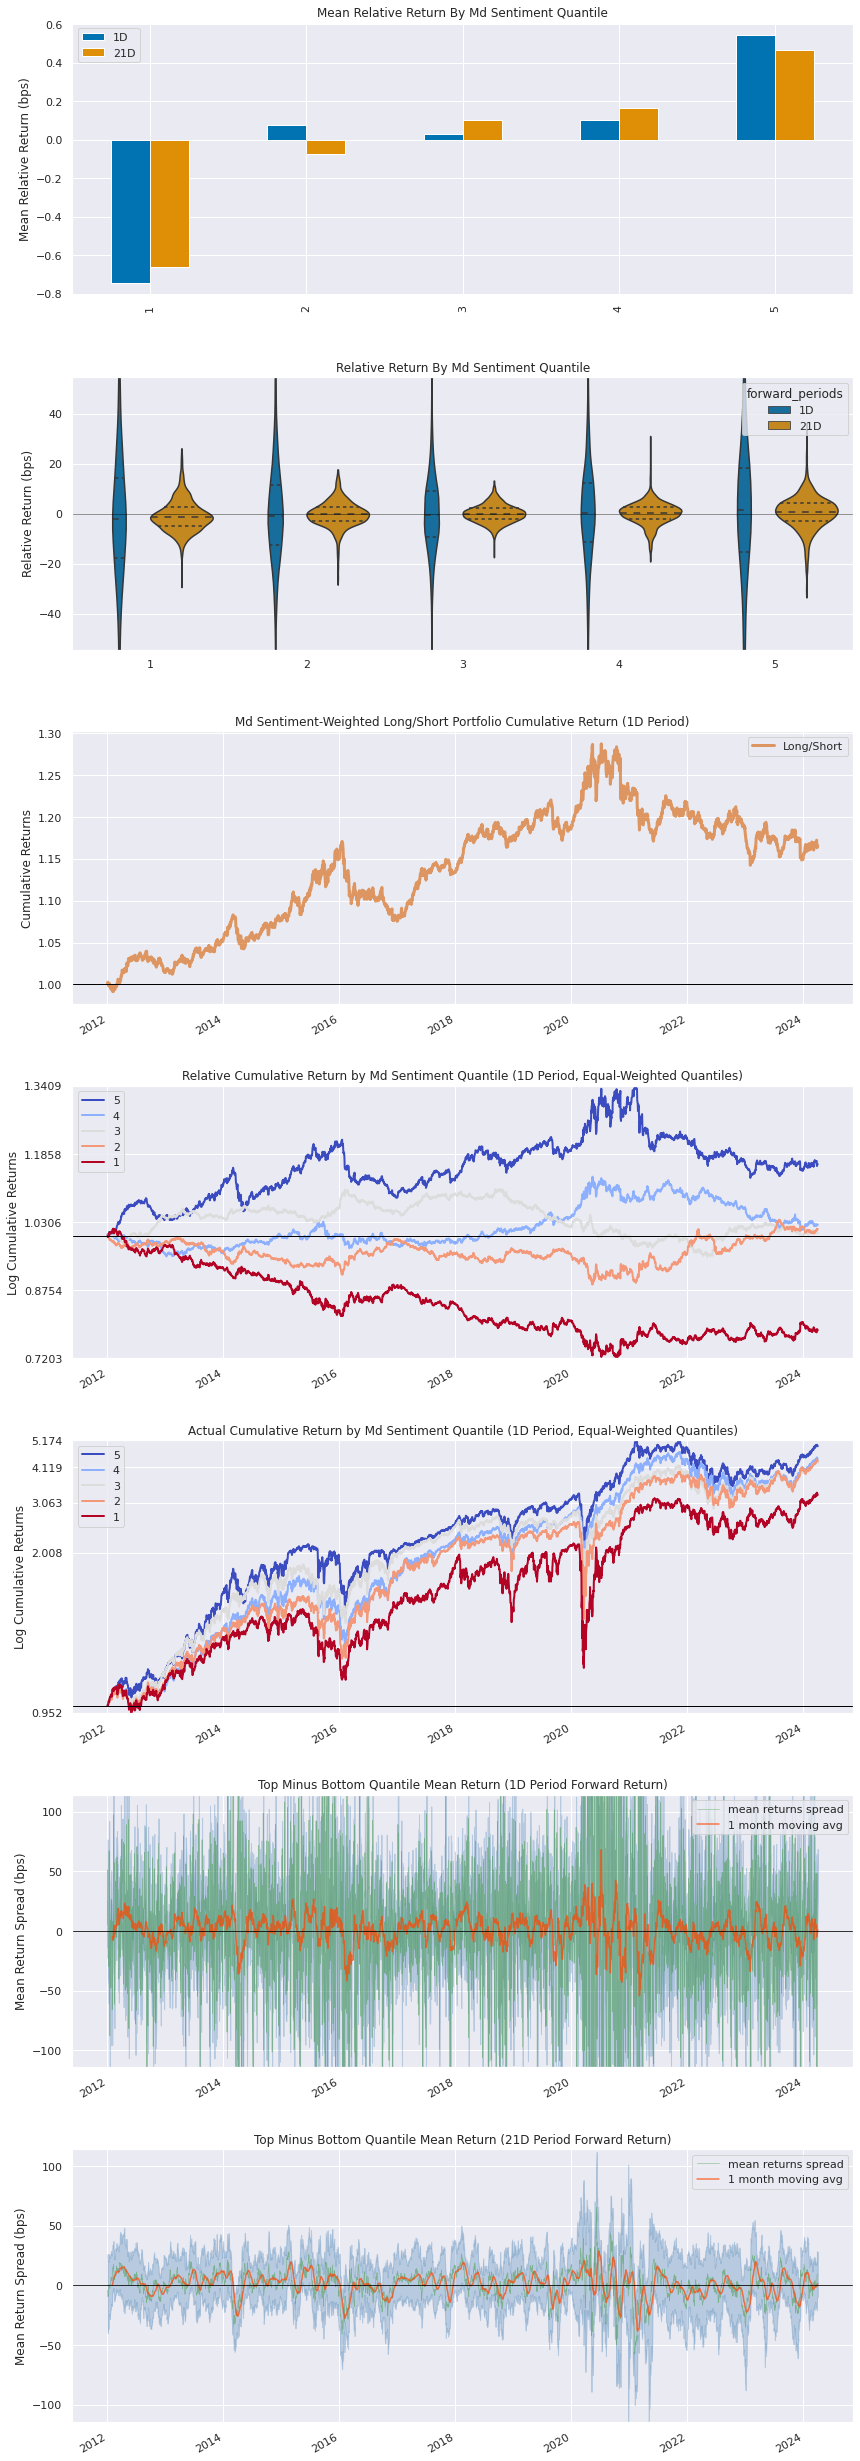

,1D,21D
IC Mean,0.008,0.013
IC Std.,0.098,0.096
Risk-Adjusted IC,0.080,0.140
t-stat(IC),4.448,7.744
p-value(IC),0.000,0.000
IC Skew,-0.174,-0.489
IC Kurtosis,0.134,0.115


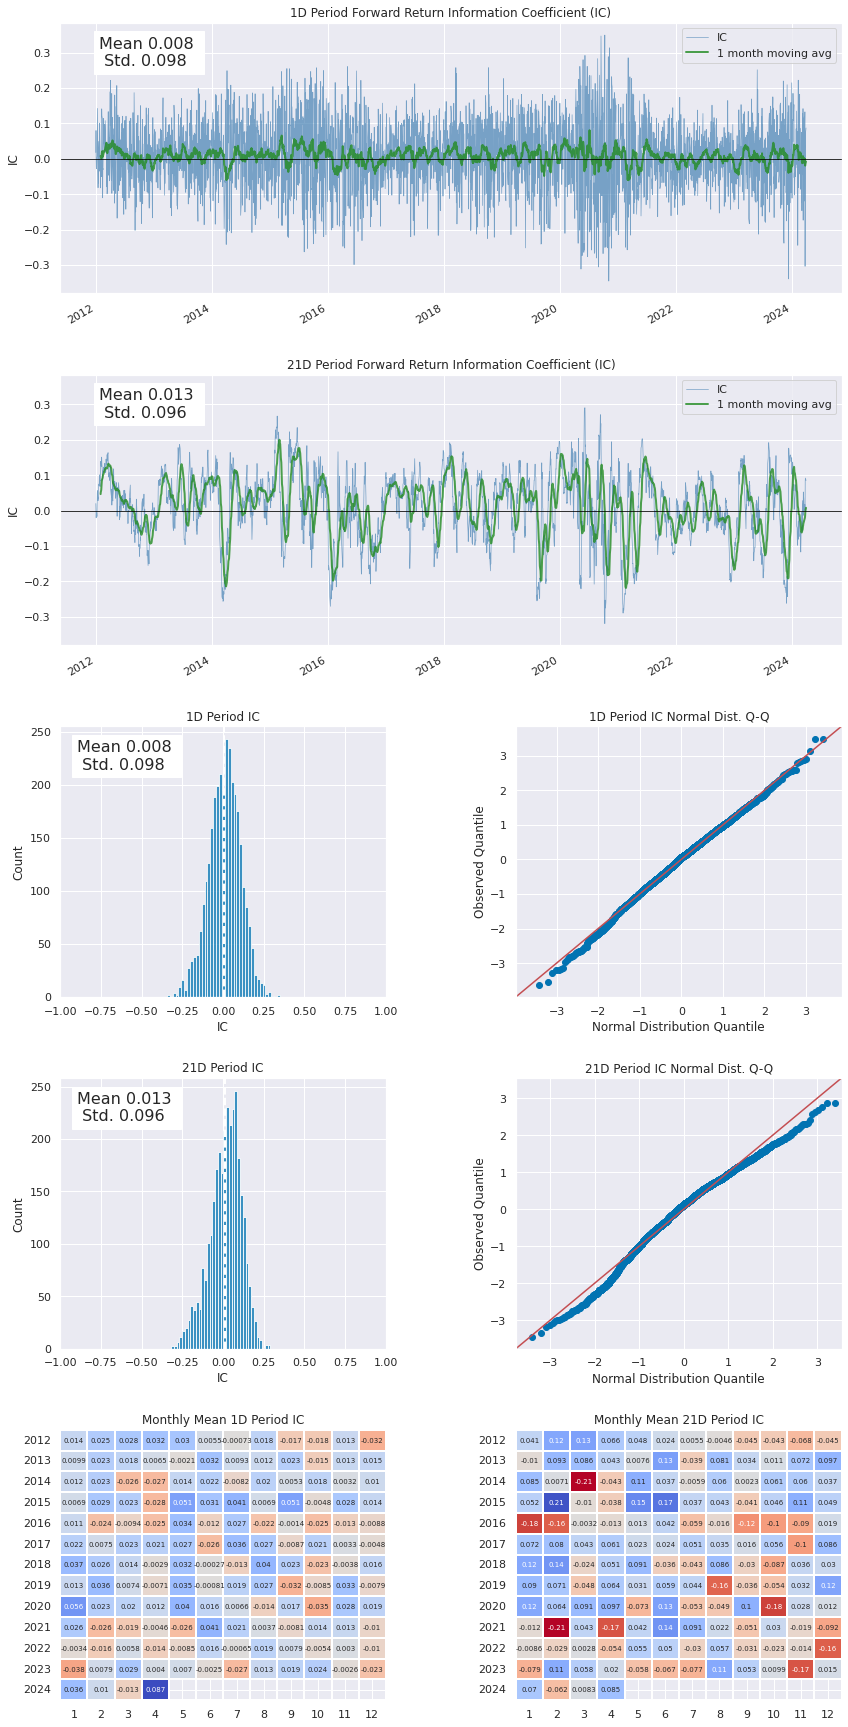

,1D,21D
Quantile 1 Mean Turnover,0.013,0.183
Quantile 2 Mean Turnover,0.021,0.273
Quantile 3 Mean Turnover,0.023,0.292
Quantile 4 Mean Turnover,0.022,0.277
Quantile 5 Mean Turnover,0.014,0.197


,1D,21D
Mean Factor Rank Autocorrelation,0.994,0.873


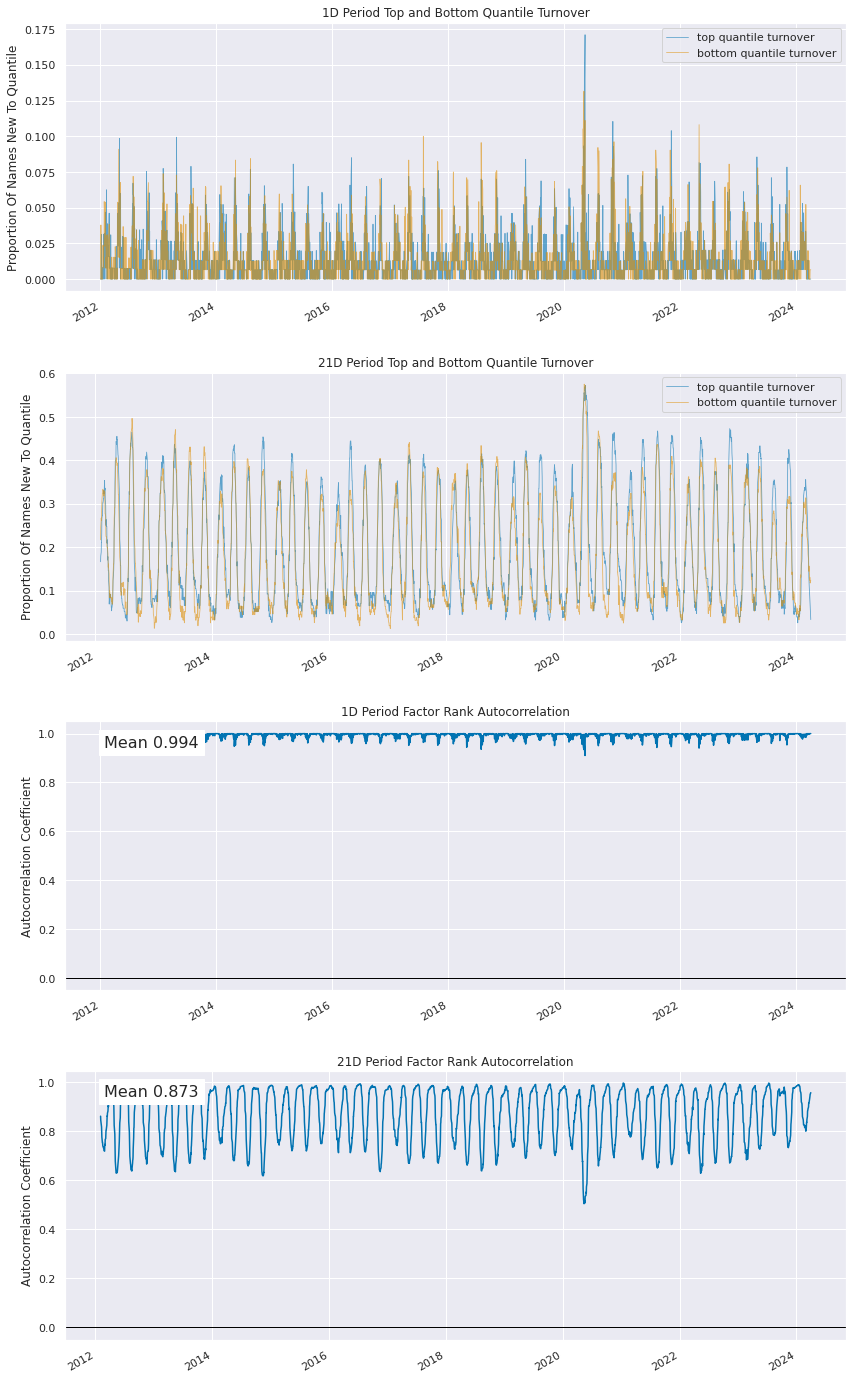

In [3]:
import alphalens as al

factor_data = al.from_pipeline(
    pipeline,
    start_date="2012-01-02", # start of dataset
    end_date="2024-03-31",
    factor="md_sentiment",
    periods=[1, 21],
    quantiles=5,
    segment="Y"
)

***

[Back to Introduction](Introduction.ipynb)